# Devel
Development of code snippets and for data exploration.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# Imports
import sys
sys.path.append('../..')

import large_image
from histomicstk.saliency.tissue_detection import get_tissue_mask
import matplotlib.pyplot as plt
import numpy as np
from ultralytics import YOLO
from os.path import join

from neurotk import imread
from neurotk.yolo import wsi_inference

### YOLO Inference for Nuclei Detection

In [3]:
# Paramters that will be CLI arguments.
args = {
    'in_file': '/jcDataStore/Data/NeuroTK-Dash/example-images/'
    'small-flourescence-image.lif'
}

In [ ]:
def wsi_inference(
):
    """Predict on large image """
    


### YOLO Inference for NFT Detection
Inference on large WSIs, using annotations as the regions to run on.

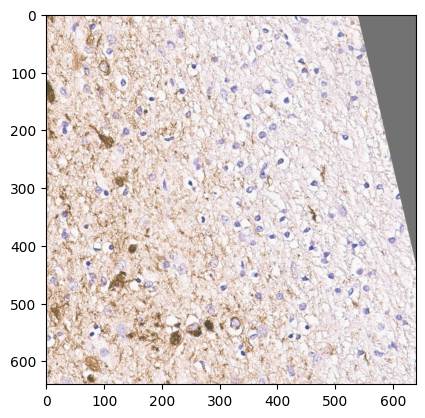

In [41]:
# # Parameters: these will be CLI arguments.
# lr_res_mag = 0.5
# in_file = '/APOLLO_NP/AutopsyImages/2020/E20-122/scanned images/E20-122_1_TAU.svs'
weights = '/jcDataStore/Data/NeuroTK-Dash/models/nft-ai-project-20X-bad/weights/best.pt'

# ts = large_image.getTileSource(in_file)

# x, y = 62082, 64248
# tile_size=1280

# img = ts.getRegion(
#     region=dict(left=x, top=y, right=x + tile_size, bottom=y + tile_size),
#     format=large_image.tilesource.TILE_FORMAT_NUMPY,
#     scale={'magnification': 20}
# )[0][:, :, :3]


from pandas import read_csv

# src_dir = '/jcDataStore/Data/NeuroTK-Dash/nuclei-detection/tiles/images'
# fp = join(src_dir, '9-12-2023 E14-06 IGHM 568 GFAP FTIC DAPI-x960y960.png')

# img = imread(fp)
df = read_csv('/jcDataStore/Data/NeuroTK-Dash/nft-detection/tiles.csv')
src_dir = '/jcDataStore/Data/NeuroTK-Dash/nft-detection/tiles/images'
# img = imread(join(src_dir, '6381486f7f8a5e686a5d7d89-x28561y11351-x960y2880.png'))

img = imread(df.sample().iloc[0].fp)
plt.imshow(img)
plt.show()

In [42]:
# weights = '/jcDataStore/Data/NeuroTK-Dash/models/nuclei-detection/version1/weights/best.pt'

model = YOLO(weights)

out = model.predict(img, device='0', conf=0.1, imgsz=1280)


0: 1280x1280 4 Pre-NFTs, 13 iNFTs, 43.5ms
Speed: 11.6ms preprocess, 43.5ms inference, 2.3ms postprocess per image at shape (1, 3, 1280, 1280)


In [ ]:
out = model.predict(img, device='cuda', conf=0.1, imgsz=640)

In [ ]:
out[0].boxes

In [ ]:
# Create a tissue low resolution mask - this will normally be pulled from DSA
# annotation for testing we will calculate it here.
ts = large_image.getTileSource(in_file)

thumbnail = ts.getRegion(
    format=large_image.tilesource.TILE_FORMAT_NUMPY,
    scale={'magnification': lr_res_mag}
)[0]

thumbnail = thumbnail[:, :, :3]

# Approximate the tissue mask.
mask = get_tissue_mask(thumbnail)[0]
mask = (mask > 0).astype(np.uint8) * 255

mask[:, :] = 0
mask[780:780+100, 800:800+100] = 255

fig = plt.figure(figsize=(10,5))
fig.add_subplot(1, 2, 1)
plt.imshow(thumbnail)
fig.add_subplot(1, 2, 2)
plt.imshow(mask, cmap='gray')
plt.show()

In [ ]:
# Test out the function.
out = wsi_inference(
    in_file, 
    model, 
    mag=20,
    mask=mask,
    device='0,1',
)

# print(out)

In [ ]:
plt.imshow(out[1])